In [3]:
# print('hi')
import cv2
from src.image.plot import show_imgs
from src.image.draw import draw_boxes
from src.image.detect import detect_objects
from src.paths import LOCAL_PROCESSED_DATA_PATH

img = cv2.imread(str(LOCAL_PROCESSED_DATA_PATH / "675a67674968e7fa78d1b972ccb1bec9e5225b08.JPEG"))
classIds, classNames, confs, bbox = detect_objects(img)
img_boxed, output_rectangles = draw_boxes(img, classIds, classNames, confs, bbox)

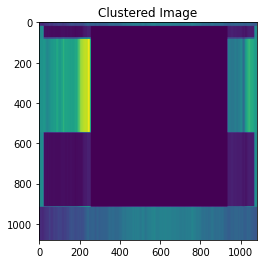

In [4]:
img = output_rectangles.copy()
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

# For clustering the image using k-means, we first need to convert it into a 2-dimensional array
# Use KMeans clustering algorithm from sklearn.cluster to cluster pixels in image
# tweak the cluster size and see what happens to the Output
kmeans = KMeans(n_clusters=3, random_state=0).fit(output_rectangles)
# dbscan = DBSCAN(eps=3, min_samples=2).fit(output_rectangles)

clustered = kmeans.cluster_centers_[kmeans.labels_]
# clustered = dbscan.labels_

# Reshape back the image from 2D to 3D image
clustered_3D = clustered
plt.imshow(clustered_3D)
plt.title('Clustered Image')
plt.show()